# Test-Driven Development/Unit Testing/Mocking

## Test-Driven Development
* not a library or an API, but rather, TDD is a way of developing software
* Python includes awesome support for TDD right out of the box
* unit testing has been an integral part of Python since version 2.1 (2001)
* numerous improvements since then
* no excuse for avoiding testing!

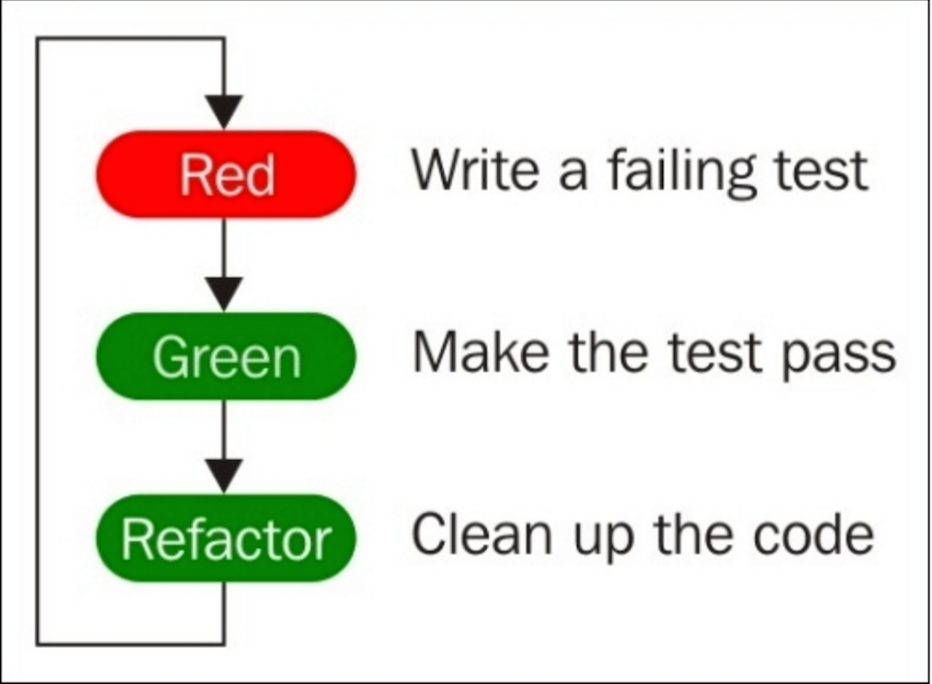

In [1]:
from IPython.display import Image
Image('TDDflowchart.png')

## Unit Testing
* the smallest testable parts of an application, called units, are individually and independently scrutinized to ensure they work
* your functions/methods/procedures should do ONE thing (and do it well)–testing that thing should be relatively easy to explain
* exercise the !$%@!$# out of the unit to be sure it works, especially with corner cases, not just the expected cases
* sometimes called "white box testing"

## Integration Testing
* unit testing = testing a single unit of code, isolated from other units
* integration testing = exercising 2+ units together, with the goal being to check whether these units have been integrated correctly
 * if any step fails, the integration test fails, but we must investigate (sometimes deeply) to find out where the failure actually occurred
 * if unit tests don't pass, there is no point in going further with an integration test

## TDD is NOT REALLY ABOUT TESTING!
* traditionally, unit testing and developer testing are about writing tests to verify the code works…
* …whereas main focus of TDD is not about testing
* writing a test before the code is implemented changes the way we think when we implement functionality
 * resulting code is more testable
 * usually simple, elegant design
 * easier to read and maintain
 * why?
* so really about writing better code, and we get an automated test suite as a nice side effect

## TDD tests
* usually require no setup, vs. traditional unit tests
* fast to run, since we run them often during development (sometimes called "micro tests")
* tests that drive the development forward
* not necessarily cover all imaginable scenarios
 * e.g., file processing function might be tested with a file that exists, a file that's unreadable, a file that doesn't exist, but not necessarily with a 1TB file
* "TDD is about writing better, cleaner, more maintainable code, and only incidentally about testing."

## TDD Testing Recap
* TDD testing general rules
 * run fast
 * standalone
 * independent
 * run full test suite before/after coding sessions
 * write a broken unit test when interrupting your work

## A Sample Class

In [2]:
class FunnyList(list):
    def __init__(self, item):
        """Allows us to create a FunnyList not only from a list,
           but ALSO from a single element
        """
        if isinstance(item, list):
            return super().__init__(item)
        else:
            return super().__init__([item])
    
    def __eq__(self, other):
        """Check for equality without concern for order.
           If the sorted versions of two FunnyLists are the
           same, then we deem the FunnyLists to be the same.
        """
        return sorted(self) == sorted(other)

    def __ne__(self, other):
        return sorted(self) != sorted(other)

    def __add__(self, thing):
        """Add to a FunnyList. Distinguish between adding a
           list/FunnyList, and something else.
        """
        if not isinstance(thing, list):
            return FunnyList(super().__add__([thing]))

        return FunnyList(super().__add__(thing))
    
    def __iadd__(self, thing):
        """Same as above except this is += instead of +."""
        if issubclass(thing.__class__, list):
            return self + thing
        else:
            return self + [thing]

In [3]:
fl = FunnyList([1, 2])
fl += 3
fl, type(fl)

([1, 2, 3], __main__.FunnyList)

In [4]:
fl1 = FunnyList([1, 2, 3])
fl2 = FunnyList([3, 2, 1])
fl1 == fl2

True

In [5]:
f1 = FunnyList([1, 2, 3])
f2 = FunnyList(4)
f1 + f2

[1, 2, 3, 4]

In [6]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l1 + l2

[1, 2, 3, 4, 5, 6]

In [7]:
f1 + 5

[1, 2, 3, 5]

In [7]:
f1 = FunnyList(['list1'])
f2 = FunnyList(2)
f1, f2

(['list1'], [2])

In [ ]:
l1 + [5]

## Testing our sample class

In [8]:
!cat funnylist3.py

class FunnyList(list):
    def __eq__(self, other):
        """Check for equality without concern for order.
           If the sorted versions of two FunnyLists are the
           same, then we deem the FunnyLists to be the same."""
        return sorted(self) == sorted(other)
    
    def __add__(self, thing):
        """Add an item to a FunnyList. We'll create a new list
           which is a copy of our current list (self) plus the
           item we want to add.
        """
        newlist = self.copy() + [thing]

        return FunnyList(newlist)


In [34]:
from funnylist3 import FunnyList
import unittest # Python's unit test module

class TestFunnyList(unittest.TestCase):
    def setUp(self):
        self.list1 = [1, 2, 3] # Python list
        self.list2 = [3, 2, 1]
        self.sclist = sorted(self.list1 + self.list2)
        self.fl1 = FunnyList(self.list1)
        self.fl2 = FunnyList(self.list2)
    
#     def test_init(self):
#         self.assertEqual(self.fl1, self.list1) # should be same
#         self.assertEqual(self.fl2, self.list2) # should be same
        
    def test_equal(self):
        self.assertTrue(self.fl1 == self.fl2)

#     def test_add_two(self):
#         self.fl3 = self.fl1 + self.fl2
#         self.assertEqual(sorted(self.fl3), self.sclist)

#     def test_plus_equals_list(self):
#         self.fl3 = self.fl1 + self.fl2
#         self.fl1 += self.fl2
#         self.assertEqual(self.fl3, self.fl1)
   
    def test_plus_obj(self):
        self.list1.append(4)
        self.fl1 = self.fl1 + 4
        self.assertEqual(self.list1, self.fl1)

#     def test_plus_equals_obj(self):
#         self.list1.append(4)
#         self.fl1 += 4
#         self.assertEqual(self.list1, self.fl1)
        
'''command line run
if __name__ == '__main__':
    unittest.main()
'''

'''Jupyter run'''
suite = unittest.TestLoader().loadTestsFromTestCase(TestFunnyList)
unittest.TextTestRunner().run(suite)


..
----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [10]:
!cat testfunnylist.py

from funnylist import FunnyList
import unittest

class TestFunnyList(unittest.TestCase):
    def setUp(self):
        self.list1 = [1, 2, 3]
        self.list2 = [3, 2, 1]
        self.sclist = sorted(self.list1 + self.list2)
        self.fl1 = FunnyList(self.list1)
        self.fl2 = FunnyList(self.list2)
    
    def test_init(self):
        self.assertEqual(self.fl1, self.list1)
        self.assertEqual(self.fl2, self.list2)

    #def test_init_with_single_value(self):
          #self.fl1 = FunnyList(1) 
          #self.assertEqual(self.fl1, [1])
        
    def test_equal(self):
        self.assertTrue(self.fl1 == self.fl2)

    def test_notequal(self):
        self.fl1.append(5)
        self.assertTrue(self.fl1 != self.fl2)

    def test_add_two(self):
        self.fl3 = self.fl1 + self.fl2
        self.assertEqual(sorted(self.fl3), self.sclist)

    def test_add_item(self):
        self.fl1 = self.fl1 + 4
        self.list1.append(4)
        self.assertEqual(self.fl1, self.list1

In [11]:
!python3 testfunnylist.py

.......
----------------------------------------------------------------------
Ran 7 tests in 0.001s

OK


## Test Coverage
* before we hand off our code, we want to be sure all tests are passing
* ...and we have 100% coverage

In [35]:
%%bash
coverage run testfunnylist.py

.......
----------------------------------------------------------------------
Ran 7 tests in 0.001s

OK


In [36]:
%%bash
#conda install coverage -y
coverage report -m

Name               Stmts   Miss  Cover   Missing
------------------------------------------------
funnylist.py          15      1    93%   9
testfunnylist.py      34      0   100%
------------------------------------------------
TOTAL                 49      1    98%


In [37]:
!coverage html

In [32]:
!cat -n funnylist.py

     1	class FunnyList(list):
     2	    def __init__(self, item):
     3	        """Allows us to create a FunnyList not only from a list,
     4	           but ALSO from a single element
     5	        """
     6	        if type(item) == list:
     7	            return super().__init__(item)
     8	        else:
     9	            return super().__init__([item])
    10	
    11	    def __eq__(self, other):
    12	        """Check for equality without concern for order.
    13	           If the sorted versions of two FunnyLists are the
    14	           same, then we deem the FunnyLists to be the same.
    15	        """
    16	        return sorted(self) == sorted(other)
    17	
    18	    def __ne__(self, other):
    19	        return sorted(self) != sorted(other)
    20	
    21	    def __add__(self, thing):
    22	        """Add to a FunnyList. Distinguish between adding a
    23	           list/FunnyList, and something else.
    24	        """
    25	        if not isinstance(thing,

## Dirty Services
* often, our code interacts with "dirty" services, i.e., those which have undesirable side effects
 * inserting into database
 * posting on the web
 * system calls / interact with OS
* …as a developer, you care more that your code correctly called the system function for ejecting a CD rather than experiencing the CD tray open every time a test is run

## Mocking
* to deal with these kinds of services, we can use the __`mock`__ subpackage of the __`unitttest`__ library
* included as of Python 3.3…before that you need to download it via PyPI
* a mock object is one that is substituted for a real object in a test case
* unlike ordinary unit tests that assert on the state of an object, mock objects are used to test that interactions between multiple objects occurs as they should
* writing test cases with mocks make our tests smarter, faster, and able to reveal more about how the software actually works

## Road to Mocking
* let's consider a simple function to remove a file

In [15]:
# rm.py
import os

def rm(filename):
    os.remove(filename)

1. first we'll write a test that creates a file and ensures our function removes it
2. then we'll create our own mock function to demonstrate mocking and explain how it works "under the hood"
3. finally, we'll use unitest.mock

## Testing our simple `rm` function

In [16]:
from rm import rm
import os.path
import tempfile
import unittest

class RmTestCase(unittest.TestCase):
    def setUp(self):
        self.tmpfilepath = os.path.join(tempfile.gettempdir(), "tmp-testfile")
        with open(self.tmpfilepath, "w") as f:
            f.write("Delete me!")
        
    def test_rm(self):
        # remove the file
        rm(self.tmpfilepath)
        # test that it was actually removed
        self.assertFalse(os.path.isfile(self.tmpfilepath),
                         "Failed to remove the file.")

'''
if __name__ == '__main__':
    unittest.main()
'''

'''IPython run'''
suite = unittest.TestLoader().loadTestsFromTestCase(RmTestCase)
unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Let's create our own mock object

In [17]:
class Mock():
    def __init__(self, retval=None):
        self.called = False # have we been called?
        self.params = ()    # what params were sent to us?
        self.retval = retval
        
    '''__call__() is a magic method that allows the object to
    called like a function'''
    def __call__(self, *args, **kwargs):
        self.called = True
        self.params = (args, kwargs)
        return self.retval

In [18]:
from mymock import Mock
m = Mock(593) # creates a Mock object, retval = 593
m.called, m.retval, m.params

(False, 593, ())

In [19]:
m('posparam1', 'posparam2', 'foo', x=5, Debug=True) # call the mock object like a function

593

In [20]:
m.called

True

In [21]:
m.params

(('posparam1', 'posparam2', 'foo'), {'x': 5, 'Debug': True})

## Using our mock object to avoid actually removing anything!

In [22]:
import unittest
from mymock import Mock

rm = Mock() # makes it so when I call rm,
            # I'm actually calling the mock

class RmTestCase(unittest.TestCase):
    def setUp(self):
        pass # no longer have to create a file
    
    def test_rm(self):
        rm('tempfile') # call mocked rm
        self.assertTrue(rm.called == True)
        print('rm.params =', rm.params)
        self.assertTrue(rm.params[0][0] == 'tempfile')

# unittest.main()
suite = unittest.TestLoader().loadTestsFromTestCase(RmTestCase)
unittest.TextTestRunner().run(suite)

.rm.params = (('tempfile',), {})

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Using unittest.mock

In [23]:
from rm import rm # my rm function
from unittest import mock
import unittest

class RmTestCase(unittest.TestCase):
    # The @mock.patch decorator results in the target imported
    # and the specified object is replaced with a new mock object
    # ...and passed as an argument to the decorated function.
    
    # Note that we must patch rm where it is used (rm.os), not
    # where it's from. So we will be creating a mock for the os
    # module inside the rm module, and the created mock is passed
    # to the decorated function.
    # test_rm = mock.patch(test_rm, mocked_object)
    @mock.patch('rm.os')
    def test_rm(self, mock_os):
        rm('foo')
        # test that rm called os.remove with the right parameters
        mock_os.remove.assert_called_with('foo')

# unittest.main()
suite = unittest.TestLoader().loadTestsFromTestCase(RmTestCase)
unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Let's make `rm` a little smarter

In [ ]:
# rm2.py
import os
import os.path

def rm(filename):
    if os.path.isfile(filename):
        os.remove(filename)

In [24]:
from rm2 import rm
from unittest import mock
import unittest

class RmTestCase(unittest.TestCase):
    # test_rm = mock.patch(mock.patch(test_rm, mock for 'rm2.os'), mock for 'rm2.os.path')
    @mock.patch('rm2.os.path')
    @mock.patch('rm2.os')
    def test_rm(self, mock_os, mock_path):
        mock_path.isfile.return_value = False
        
        rm('any path')
        
        self.assertFalse(mock_os.remove.called, ''' 
                Tried to remove when file not present.''')
        # make the file 'exist'
        mock_path.isfile.return_value = True
        
        rm('any path')
        mock_os.remove.assert_called_with('any path')

# unittest.main()
suite = unittest.TestLoader().loadTestsFromTestCase(RmTestCase)
unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## What about mocks for objects?

In [ ]:
import os
import os.path

class RemovalService():
    '''A service for removing objects from the filesystem'''

    def rm(self, filename):
        if os.path.isfile(filename):
            os.remove(filename)
            
class UploadService():
    '''Upload a file and remove it once the upload is complete'''
    
    def __init__(self, removal_service):
        self.removal_service = removal_service
        
    def upload_complete(self, filename):
        self.removal_service.rm(filename)

## ...now we have a file removal service and an upload service that depends on it
* how do we test __`UploadService`__?
 1. either mock out the __`RemovalService.rm`__ method itself
 2. OR supply a mocked instance in the constructor of __`UploadService`__

## Option 1: mock out method itself using `@mock.patch.object`

In [24]:
from services import RemovalService, UploadService
from unittest import mock
import unittest

class UploadServiceTestCase(unittest.TestCase):
    # mock out 
    @mock.patch.object(RemovalService, 'rm')
    def test_upload_complete(self, mock_rm):
        # when we create a RemovalService object...
        # ...the rm method will automatically be mocked
        removal_service = RemovalService()

        ref = UploadService(removal_service)

        # call upload_complete, which should, in turn, call `rm`:
        ref.upload_complete("my uploaded file")
        
        # check that it called the rm method of any RemovalService
        #mock_rm.assert_called_with("my uploaded file")
        
        # check that it called the rm method of _our_ removal_service
        removal_service.rm.assert_called_with("my uploaded file")

# unittest.main()
suite = unittest.TestLoader().loadTestsFromTestCase(UploadServiceTestCase)
unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.016s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Option 2: supply a mocked instance to UploadService

In [25]:
from services import RemovalService, UploadService
from unittest import mock
import unittest

class UploadServiceTestCase(unittest.TestCase):
    def test_upload_complete(self):
        # build our dependencies
        mock_removal_service = mock.create_autospec(RemovalService)
        ref = UploadService(mock_removal_service)
        
        # call upload_complete, which should, in turn, call `rm`:
        ref.upload_complete("my uploaded file")
        
        # test that it called the rm method
        mock_removal_service.rm.assert_called_with("my uploaded file")

#unittest.main()
suite = unittest.TestLoader().loadTestsFromTestCase(UploadServiceTestCase)
unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.058s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## autospec

In [26]:
from unittest.mock import Mock

def function(a, b, c):
    # ...
    return "foo"

mockfunc = Mock()
mockfunc(1, 2, 3)

<Mock name='mock()' id='140211415932880'>

In [27]:
mockfunc.called

True

In [28]:
mockfunc.call_args

call(1, 2, 3)

In [29]:
# ...but we need not call the function with the correct number of args
mockfunc(1)
mockfunc.call_args

call(1)

In [30]:
from unittest.mock import create_autospec
mockfunc = create_autospec(function, return_value='foo')
mockfunc(1, 2, 3)

'foo'

## Lab: Unittest/Mocking
1. Write at least two unit tests for the Word class in Notebook 02.
2. Write a method which interacts with a not-yet-implemented library function named foo(), which takes exactly 2 arguments and returns the sum of those arguments. Use an autospec-ed mock in place of foo().
2. Using the examples as a template, create a method which changes the permissions (__`os.chmod()`__) on a file, and use mocks to avoid actually changing a file's permissions